In [1]:
# Notebook: SciKit Learn Pipeline For NLP
# Author: Thomas Purk
# Date: 2025-03-31
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# Referemce: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
# Reference: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/data
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/


# SciKit Learn Pipeline For NLP

> Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

> CountVectorizer - Convert a collection of text documents to a matrix of token counts.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

> Multinomial Naive Bayes - Naive Bayes classifier for multinomial models. The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

> Transform a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

**Dataset**

This notebook is based off of coursework from https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/ and other sources. Although there is a Yelp dataset distributed via Kaggle, the csv file used here is from the course and appears to be an identical copy.

> This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the most recent dataset you'll find information about businesses across 8 metropolitan areas in the USA and Canada.

https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/data

In [174]:
# Notebook Setup
import string
import json

# Data, Science, & Math
import numpy as np
import pandas as pd
import random

# Visualization
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Use imbalanced-learn's pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# NLP
# import nltk
# from nltk.corpus import movie_reviews
# from nltk.corpus import stopwords
# from nltk.classify import NaiveBayesClassifier
# from nltk.classify.util import accuracy

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time#

In [3]:
# Load Data
# Source: Obtained from the "Python for Data Science and Machine Learning Bootcamp"
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/
from google.colab import files
uploaded = files.upload()

Saving yelp.csv to yelp.csv


In [4]:
# Load Data - continued
filename = list(uploaded.keys())[0]  # Get uploaded filename
df = pd.read_csv(filename)

# Validate
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# View Structural Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
# View Summary Statistics
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Count of Stars Given')

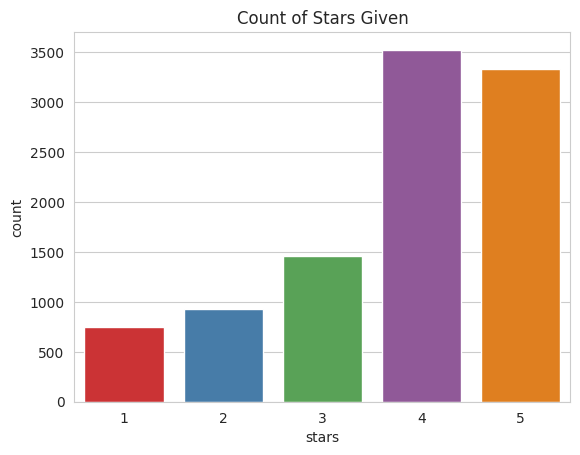

In [14]:
# Explore the count of star rating categories
sns.countplot(
    data=df,
    x='stars',
    palette='Set1'
)
plt.title('Count of Stars Given')

In [ ]:
# Observations:
# - Stars 1, 2, and 3 are unbalanced with 4 or 5
# - This could cause the predicted classes to favor 4 and 5

In [16]:
# Investigate whether the length of text written is relevant
df['text_length'] = df['text'].apply(len)

Text(0.5, 1.0, 'Text Length Quartiles Per Rating')

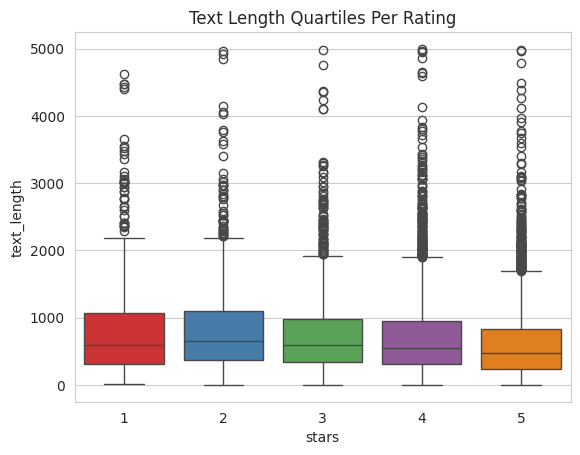

In [175]:
# Create a text_length box plot
sns.boxplot(
    data=df,
    x='stars',
    y='text_length',
    palette='Set1'
)

plt.title('Text Length Quartiles Per Rating')

Text(0.5, 1.0, 'Correlation of Grouped Means')

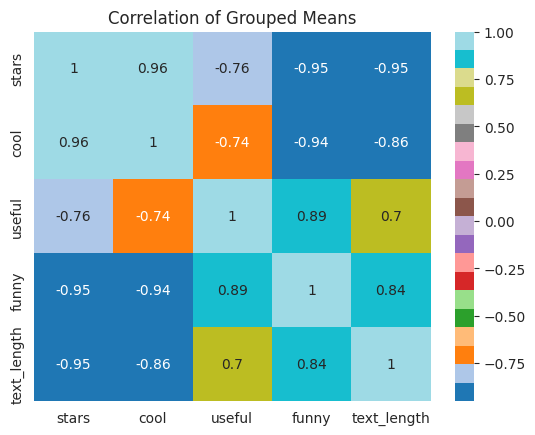

In [176]:
# Investigate correlations among star rating grouped means
#plt.colormaps()

df_grouped = df.groupby(by='stars').mean(numeric_only=True).reset_index()

sns.heatmap(
    data=df_grouped.corr(),
    cmap='tab20',
    annot=True
)

plt.title('Correlation of Grouped Means')

## Train an NLP Pipeline Model

In [210]:
# Setup vocabulary as the top 2000 non-stop words

# Fit a CountVectorizer
cv_transformer = CountVectorizer(stop_words='english')
X_cv = cv_transformer.fit_transform(list(df['text']))

# Get all words in the corpus
all_words = cv_transformer.get_feature_names_out()

# Sum occurrences of each word
word_freq = np.array(X_cv.sum(axis=0)).flatten()

# Combine words and frequencies
word_freq_dict = dict(zip(all_words, word_freq))

# Sort words by frequency (descending)
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)


top_words = sorted_word_freq[:2000]

top_words = [ x[0] for x in top_words ]

print(f'Full Vocabulary Count: {len(all_words)}')
print(f'Top Vocabulary Count: {len(top_words)}')

Full Vocabulary Count: 28880
Top Vocabulary Count: 2000


In [211]:
# Create a list of steps in as a tuple (name, transformer)
# the last step must be an estimator
steps = [
    ('bow', CountVectorizer(vocabulary=top_words)), # 2. Tokenize training data
    ('tfidf', TfidfTransformer()), # 3 Train word tfidf weight on word count vector
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # 4 Apply SMOTE oversampling
    ('classifier',MultinomialNB()) # 5 Train predictive model on tfidf weigths
]

# Create a new pipeline to execute all the steps
pipeline = ImbPipeline(steps)

In [206]:
# Setup train and test datasets

X = df['text'] # data
y = df['stars'] # labels

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3
)


In [212]:
# Execute the pipeline and
pipeline.fit(X_train,y_train)
pipeline

Pipeline(steps=[('bow',
                 CountVectorizer(vocabulary=['good', 'place', 'food', 'great',
                                             'like', 'just', 'time', 'really',
                                             'service', 've', 'don', 'love',
                                             'little', 'nice', 'best', 'got',
                                             'pretty', 'restaurant', 'chicken',
                                             'try', 'ordered', 'menu', 'people',
                                             'know', 'bar', 'order', 'didn',
                                             'think', 'better', 'friendly', ...])),
                ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MultinomialNB())])

In [213]:
# Make preductions on the test data
predictions = pipeline.predict(X_test)

cr = classification_report(
    y_true=y_test,
    y_pred=predictions
)

print('Classification Report: 1 = True, 0 = False')
print('')
print(cr)

Classification Report: 1 = True, 0 = False

              precision    recall  f1-score   support

           1       0.41      0.62      0.49       225
           2       0.34      0.42      0.38       278
           3       0.34      0.41      0.37       438
           4       0.54      0.45      0.49      1058
           5       0.63      0.57      0.60      1001

    accuracy                           0.49      3000
   macro avg       0.45      0.49      0.47      3000
weighted avg       0.51      0.49      0.50      3000



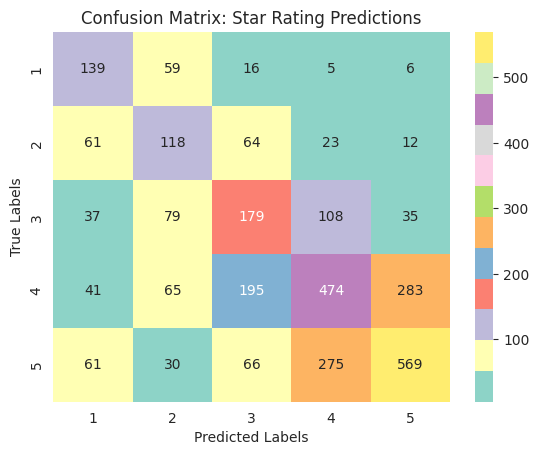

In [214]:

# Explore a confusion matrix
cm = confusion_matrix(y_test, predictions)

classes = np.unique(y_test)

sns.heatmap(
    data=cm,
    annot=True,
    fmt='d', # string formating code
    xticklabels=classes,
    yticklabels=classes,
    cmap='Set3'
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Star Rating Predictions')
plt.show()

In [ ]:
# Observations:
# - Most predictions are 4 and 5, this could be because most data is 4 or 5
# - Top count of 2000 words passed into CountVectorizer as vocabulary improve results
# - Removing stop words did not help much
# - Adding Synthetic Minority Oversampling Technique (SMOTE) to balance classes did not impove overall accuracy
# - SMOTE did help accuracy for classes 1,2,&3 but overall accuracy is low.
# - What people write, and what star they pick is highly subjective.
# - One hypothesis; the words used in adjacent classes are too similar, i.e. 2 and 3 words are mostly the same